## NHS Post processing Library - Visualizations

This notebook provides examples on how to carry out data visualization using the post_processing python library. Be sure to go through the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/latest/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/latest/index.html) for instructions on how to access and import the libary and its packages.

##### Note: 
The Library is still under active development and empty sections will be completed in Due time

### Table of content
- Plots
- Bounded Plots
- Scatter Plots
- Histograms
- QQPlots

##### All files are available in the docs/source/notebooks folder where the notebook is located

### Requirements

The conda environmnent contains all libraries associated the post processing library. After setting up the conda environment, you only have to import the visualization modules from postprocessinglib.evaluation.

In this example though, I will also be importing other modules to help generate the data that I will be trying to visualize.

In [1]:
### Remove and modify these later.
import sys
import pandas as pd
sys.path.append("../../../")

In [2]:
from postprocessinglib.evaluation import data, visuals

Lets use one of the data blocks from the data manipulation tutorial

In [3]:
# passing a controlled csv file for testing
path_output = "MESH_output_streamflow_2.csv"
path_input = "Station_data.xlsx"

DATAFRAMES = data.generate_dataframes(csv_fpath=path_output, warm_up=365,
                                      daily_agg = True, da_method = 'min',
                                      weekly_agg = True, wa_method = 'min',
                                      monthly_agg = True, ma_method = 'inst',
                                      yearly_agg = True, ya_method = 'sum',
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'), sp_subset = ('1981-01-01', '1985-12-31'),
                                      long_term = True, lt_method = ["mean" ,'q75' ,'Q25'],)
Stations = pd.read_excel(io=path_input)

ignore = []
for i in range(0, len(Stations)):
    if Stations['Properties'][i] == 'X':
        ignore.append(i)

Stations = Stations.drop(Stations[Stations['Properties'] == 'X'].index)
Stations = Stations.set_index('Station Number')

for i in reversed(ignore):
        DATAFRAMES["DF_OBSERVED"] = DATAFRAMES["DF_OBSERVED"].drop(columns = DATAFRAMES['DF_OBSERVED'].columns[i])
        DATAFRAMES['DF_SIMULATED']  = DATAFRAMES["DF_SIMULATED"].drop(columns = DATAFRAMES['DF_SIMULATED'].columns[i])
        for key, dataframe in DATAFRAMES.items():
            if key != "DF_SIMULATED" and key != "DF_OBSERVED":
                DATAFRAMES[key] = dataframe.drop(columns = dataframe.columns[[2*i, 2*i+1]])
            

for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02
DF:
            QOMEAS1     QOSIM1  QOMEAS2    QOSIM2  QOMEAS3    QOSIM3  QOMEAS4  \
1982-10-02    15.00  12.710840      NaN  2.124695    1.840  1.442218     37.6   
1982-10-03    14.80  12.064640      NaN  1.266883    1.840  1.223653     39.6   
1982-10-04    15.20  11.925050      NaN  0.854982    1.690  1.083362     38.7   
1982-10-05    15.00  11.872900      NaN  0.654379    1.580  0.989998     37.6   
1982-10-06    14.10  11.844660      NaN  0.553681    1.430  0.916533     29.8   
...             ...        ...      ...       ...      ...       ...      ...   
2016-12-27     8.62   0.618894      NaN  0.422334    0.966  0.335788     20.7   
2016-12-28     8.64   0.612090      NaN  0.421136    1.010  0.333170     22.0   
2016-12-29     8.63   0.605523      NaN  0.419943    1.030  0.330585     24.5   
2016-12-30     8.64   0.598825    

Now that we have our data, let's jump right in!

### LINE PLOT

Starting off simple - one of the most important plots when working with hydrology and flow forecasting is the line plot of stream flow, stage or discharge.
Using the data generated above we can plot these using our plot function.

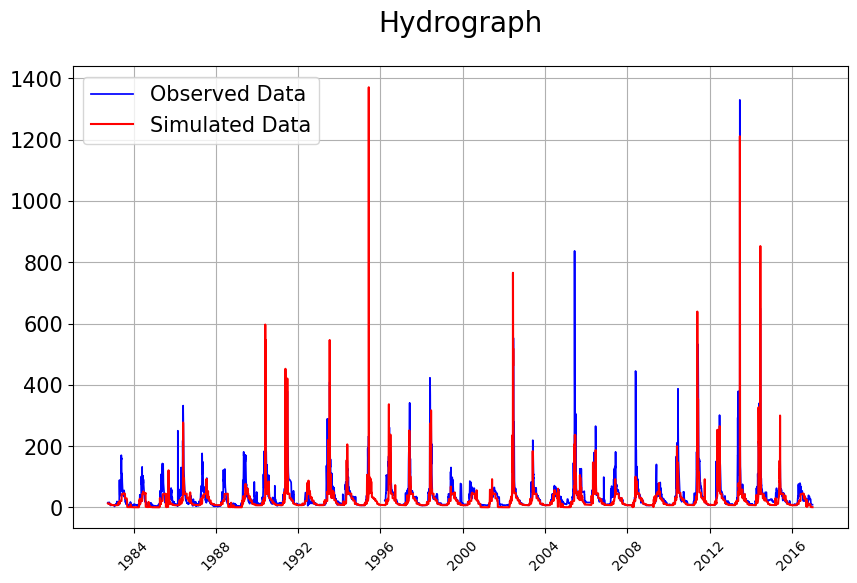

In [4]:
# A very simple plot can be generated as shown below
# Just plotting the first station
visuals.plot(
    merged_df = DATAFRAMES["DF"].iloc[:, [0, 1]],
    title='Hydrograph',
    grid=True,
)

Lets zoom into a few years, say 2000-2005

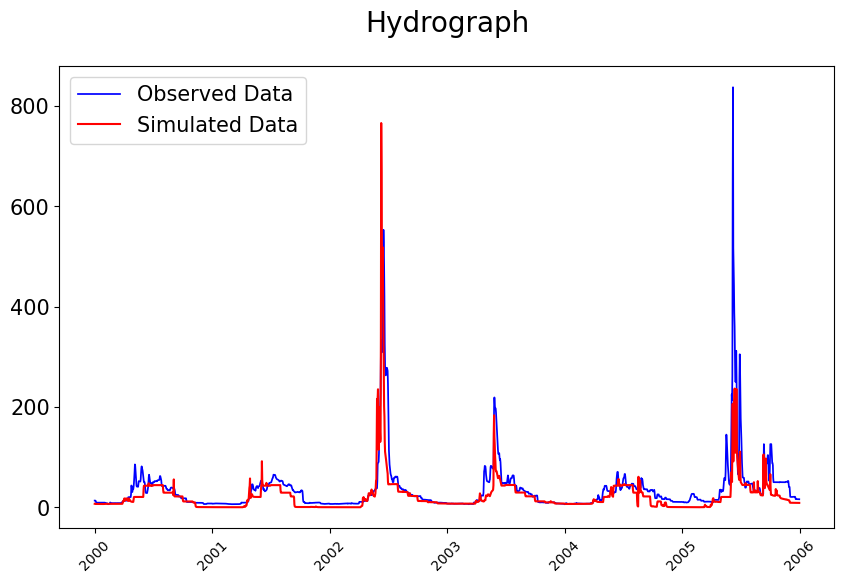

In [5]:
visuals.plot(
    merged_df = DATAFRAMES["DF"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1]],
    title='Hydrograph',
)

We are also able to plot the observed and simulated data in cases where we are not able to obtain them already merged together. This way we are not limited to a merged dataframe. This is shown below:

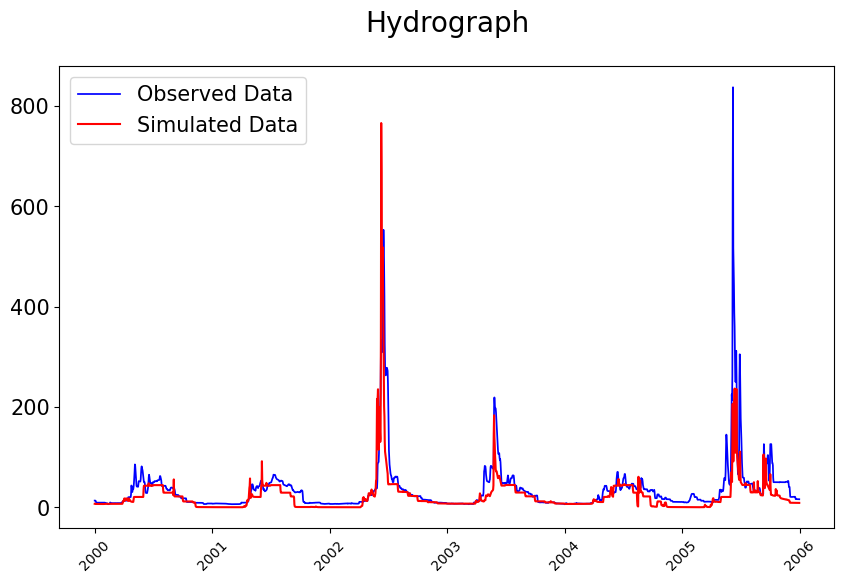

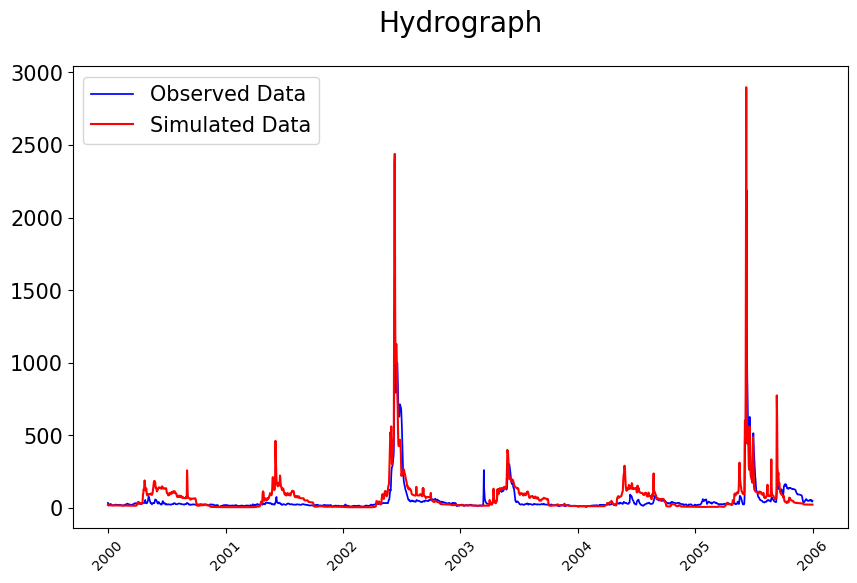

In [6]:
# plotting the first and fourth stations..
visuals.plot(
    sim_df = DATAFRAMES["DF_SIMULATED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 3]],
    obs_df = DATAFRAMES["DF_OBSERVED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 3]],
    title='Hydrograph',
)

The plot function also gives us complete control of the plot parameters. It allows you the flexibility to change the line colors, line width, axis labels, add grid lines, each plots title, the line legends and much more. There also exists an option to save the files as png images each with its own distinct name! 

All the posibilities can be found over at the documentation website linked [here](https://nhs-postprocessing.readthedocs.io/en/latest/api/postprocessinglib.evaluation.visuals.plot.html#postprocessinglib.evaluation.visuals.plot). Some examples of these are shown below:

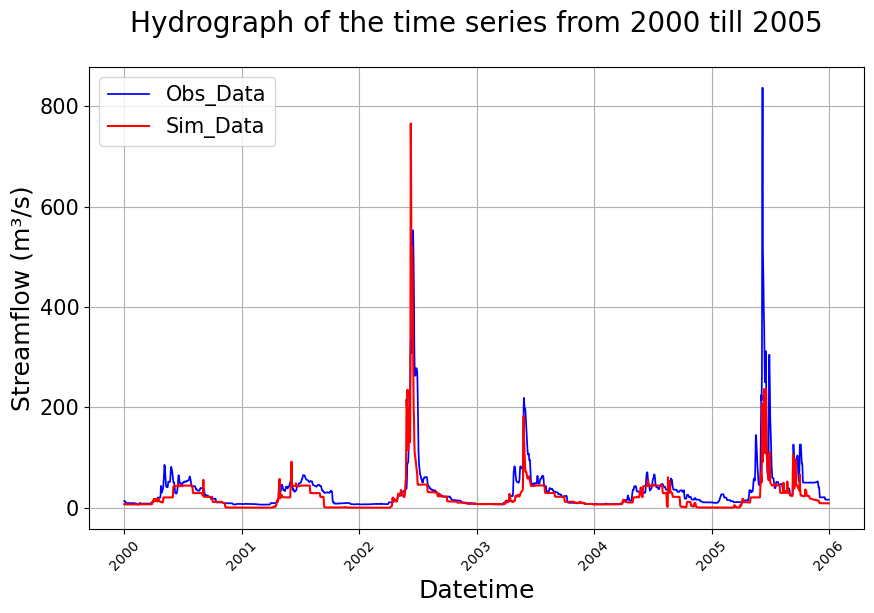

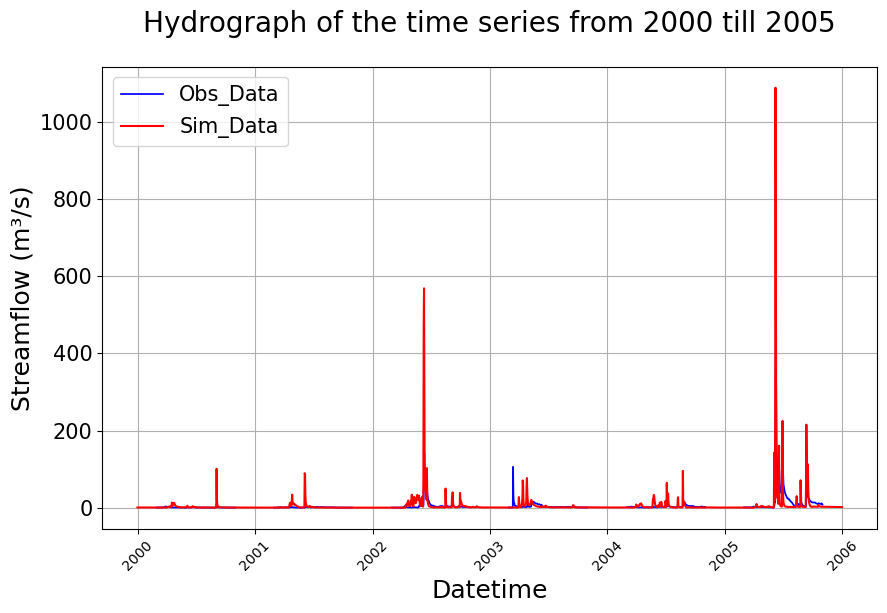

In [7]:
# Changing the default naming conventions
visuals.plot(
    merged_df =DATAFRAMES["DF"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1, 2, 3]],
    title='Hydrograph of the time series from 2000 till 2005',
    linestyles=('r-', 'b-'),
    legend=('Sim_Data', 'Obs_Data'),
    labels=('Datetime', 'Streamflow'),
    grid=True,
    )

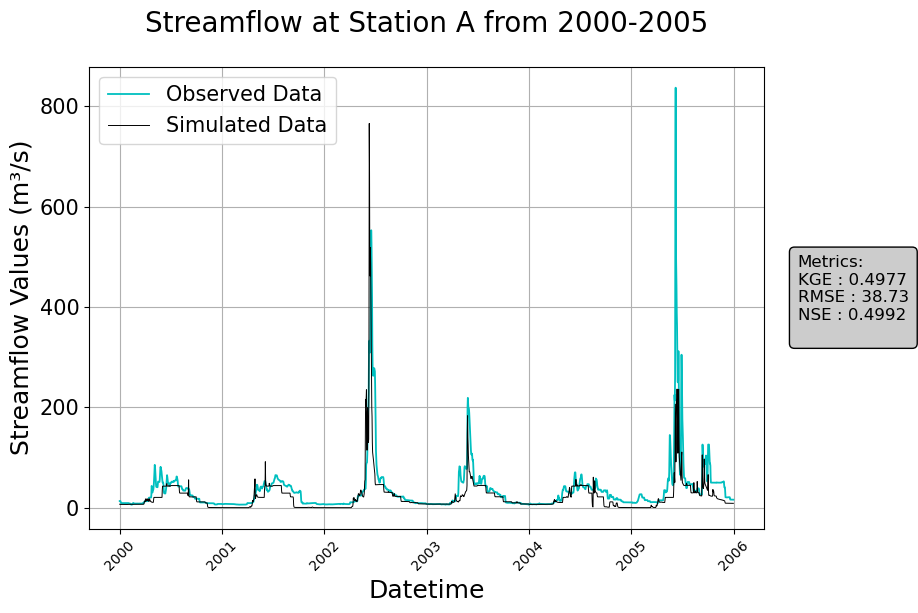

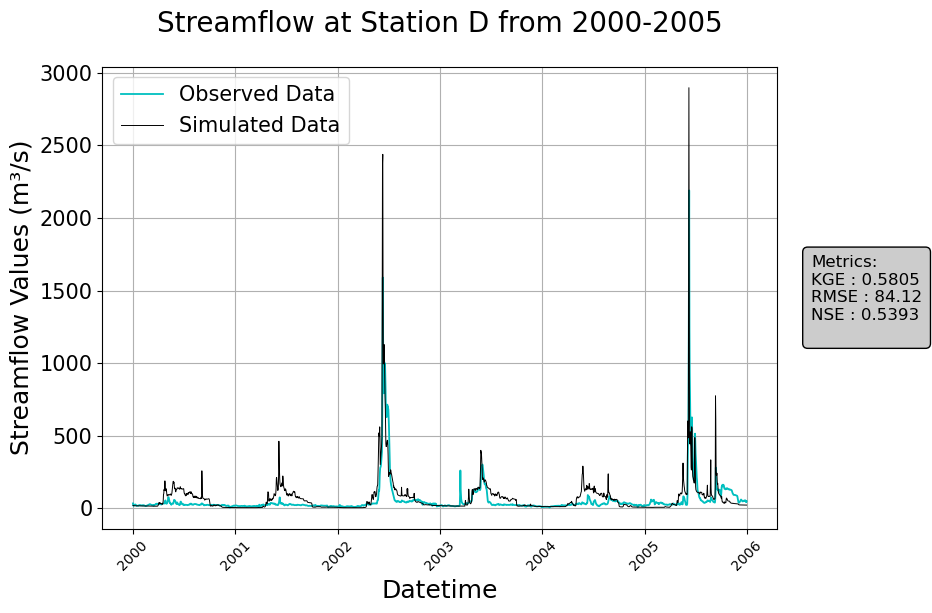

In [8]:
# Including the metrics in the plots for the 1st and 4th Stations
visuals.plot(
    merged_df =DATAFRAMES["DF"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1, 6, 7]],
    # including multiple plot titles
    title=['Streamflow at Station A from 2000-2005', 'Streamflow at Station D from 2000-2005'],
    fig_size=(10, 6),
    linestyles=['k-', 'c-'],
    labels=['Datetime', 'Streamflow Values'],
    linewidth=(0.7, 1.3),
    # include metrics
    metrices = ['KGE', 'RMSE', 'NSE'],
    grid=True,
    # To save, uncomment the two lines below
    # save = True, 
    # save_as = [station_a(2000-2005), station_b(2000-2005)],
    # The two images will be saved as png files with names as entered above
    )

### BOUNDED PLOTS

Another really important plot is the bounded plot